In [112]:
import types
from botocore.client import Config
import ibm_boto3
import requests 
import pandas as pd
import numpy as np
import random 

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix

import itertools

import matplotlib.pyplot as plt

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

def __iter__(self): return 0

# @hidden_cell
client_8a19d847484a484a95d56b752d1a1d1c = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='MWgNox1_f5qrzFRANUxjSVENF1sSLETB5EJwUSpV6h_d',
    ibm_auth_endpoint="https://iam.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_8a19d847484a484a95d56b752d1a1d1c.get_object(Bucket='datasciencecapstoneproject-donotdelete-pr-xxxxkdizpev2fp',Key='Data.csv')['Body']
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )


Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.



In [113]:
#import store addresses and revenue category
store_data = pd.read_csv(body)

#combinate city and address to one field
store_data['StoreAddress'] = store_data['Address'] + "," + store_data['City']

#initialize fields for latitude and longitude
store_data['latitude'] = 0
store_data['longitude'] = 0

In [114]:
for index, row in store_data.iterrows():
    if store_data.loc[index, 'latitude'] == 0:
        geolocator = Nominatim(user_agent="store_explorer")
        location = geolocator.geocode(row['StoreAddress'])
        x = location.latitude
        y = location.longitude    
    
        store_data.loc[index, 'latitude'] = x
        store_data.loc[index, 'longitude'] = y  

In [76]:
store_data.head(50)

,Store,Address,ZIP,City,Group,StoreAddress,latitude,longitude
0,F101,Elberfelder Str. 86,40822,Mettmann,1,"Elberfelder Str. 86, Mettmann",51.248775,6.989703
1,F102,Frankfurter Str. 243C,38122,Braunschweig,2,"Frankfurter Str. 243C, Braunschweig",52.247049,10.510379
2,F103,Fallerslebener Str. 2,38518,Gifhorn,2,"Fallerslebener Str. 2, Gifhorn",52.481839,10.545415
3,F104,Hafelsstr. 237,47809,Krefeld,1,"Hafelsstr. 237, Krefeld",51.321655,6.604901
4,F105,Hasporter Damm 110,27749,Delmenhorst,2,"Hasporter Damm 110, Delmenhorst",53.037767,8.645715
5,F106,Pommernstr. 2,93073,Neutraubling,2,"Pommernstr. 2, Neutraubling",48.982768,12.194072
6,F107,Rellinghauser Str. 334F,45136,Essen,2,"Rellinghauser Str. 334F, Essen",51.432876,7.035404
7,F108,Schulenburger Landstr. 120,30165,Hannover,2,"Schulenburger Landstr. 120, Hannover",52.405520,9.712731
8,F109,Casterfeldstr. 58,68199,Mannheim,1,"Casterfeldstr. 58, Mannheim",49.448060,8.501952
9,F110,Edisonstr. 3,59174,Kamen,1,"Edisonstr. 3, Kamen",51.571681,7.675574


In [153]:
#print a map with Kassel as a center (central city in Germany)

address = 'Kassel'

geolocator = Nominatim(user_agent="germany_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

# create map of Germany using latitude and longitude values
map_germany = folium.Map(location=[latitude, longitude], zoom_start=7)

# add markers to map
for lat, lng, store in zip(store_data['latitude'], store_data['longitude'], store_data['Store']):
    label = '{}'.format(store)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_germany)  
    
map_germany

In [115]:
CLIENT_ID = 'ZVUXW4ABCGDTKC4GKWBC4KSSD3PQBD10XT5OBYGHM00IZMYU' 
CLIENT_SECRET = 'YHZHTDWOHSRYMNTDEDXNZSME04CSPO54IFS4RZUXYVTH4OHD' 
VERSION = '20180604'
LIMIT = 100

In [117]:
#count columns
store_data['count_stables'] = 0
store_data['count_clubs'] = 0
store_data['count_schools'] = 0
store_data['count_competition'] = 0

#find stables in surrounding area (30 km)
search_query = 'Reitstall'
radius = 30000

#for each store find stables
for index, row in store_data.iterrows():
        latitude = store_data.loc[index, 'latitude']
        longitude = store_data.loc[index, 'longitude']
        
        #build url
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
        #retrieve results
        results = requests.get(url).json()
        
        # assign relevant part of JSON to venues
        venues = results['response']['venues']

        # tranform venues into a dataframe
        dataframe = json_normalize(venues)
        
        #count results
        count = len(dataframe.index)
        
        #assign count to store
        store_data.loc[index, 'count_stables'] = count
        
#find schools in surrounding area (30 km)
search_query = 'Reitschule'
radius = 30000

#for each store find stables
for index, row in store_data.iterrows():
        latitude = store_data.loc[index, 'latitude']
        longitude = store_data.loc[index, 'longitude']
        
        #build url
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
        #retrieve results
        results = requests.get(url).json()
        
        # assign relevant part of JSON to venues
        venues = results['response']['venues']

        # tranform venues into a dataframe
        dataframe = json_normalize(venues)
        
        #count results
        count = len(dataframe.index)
        
        #assign count to store
        store_data.loc[index, 'count_schools'] = count
        
#find clubs in surrounding area (30 km)
search_query = 'Reitverein'
radius = 30000

#for each store find stables
for index, row in store_data.iterrows():
        latitude = store_data.loc[index, 'latitude']
        longitude = store_data.loc[index, 'longitude']
        
        #build url
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
        #retrieve results
        results = requests.get(url).json()
        
        # assign relevant part of JSON to venues
        venues = results['response']['venues']

        # tranform venues into a dataframe
        dataframe = json_normalize(venues)
        
        #count results
        count = len(dataframe.index)
        
        #assign count to store
        store_data.loc[index, 'count_clubs'] = count
        
#find competition in surrounding area (10 km)
search_query = 'Reitsport Geschäft'
radius = 10000

#for each store find stables
for index, row in store_data.iterrows():
        latitude = store_data.loc[index, 'latitude']
        longitude = store_data.loc[index, 'longitude']
        
        #build url
        url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
        
        #retrieve results
        results = requests.get(url).json()
        
        # assign relevant part of JSON to venues
        venues = results['response']['venues']

        # tranform venues into a dataframe
        dataframe = json_normalize(venues)
        
        #count results
        count = len(dataframe.index)
        
        #assign count - 1 (-1 because own store is included in result) to store 
        store_data.loc[index, 'count_competition'] = count - 1

In [118]:
store_data.head(50)

,Store,Address,ZIP,City,Group,StoreAddress,latitude,longitude,count_stables,count_clubs,count_schools,count_competition
0,F101,Elberfelder Str. 86,40822,Mettmann,1,"Elberfelder Str. 86, Mettmann",51.248775,6.989703,36,7,9,19
1,F102,Frankfurter Str. 243C,38122,Braunschweig,0,"Frankfurter Str. 243C, Braunschweig",52.247049,10.510379,4,1,0,19
2,F103,Fallerslebener Str. 2,38518,Gifhorn,0,"Fallerslebener Str. 2, Gifhorn",52.481839,10.545415,3,2,0,5
3,F104,Hafelsstr. 237,47809,Krefeld,1,"Hafelsstr. 237, Krefeld",51.321655,6.604901,37,3,9,9
4,F105,Hasporter Damm 110,27749,Delmenhorst,0,"Hasporter Damm 110, Delmenhorst",53.037767,8.645715,3,1,1,8
5,F106,Pommernstr. 2,93073,Neutraubling,0,"Pommernstr. 2, Neutraubling",48.982768,12.194072,4,0,0,12
6,F107,Rellinghauser Str. 334F,45136,Essen,0,"Rellinghauser Str. 334F, Essen",51.432876,7.035404,28,10,7,35
7,F108,Schulenburger Landstr. 120,30165,Hannover,0,"Schulenburger Landstr. 120, Hannover",52.405520,9.712731,4,3,0,23
8,F109,Casterfeldstr. 58,68199,Mannheim,1,"Casterfeldstr. 58, Mannheim",49.448060,8.501952,5,13,2,17
9,F110,Edisonstr. 3,59174,Kamen,1,"Edisonstr. 3, Kamen",51.571681,7.675574,6,12,1,6


In [119]:
#define Features
X = np.asarray(store_data[['count_stables', 'count_clubs', 'count_schools', 'count_competition']])

In [120]:
#define Target
y = np.asarray(store_data['Group'])

In [121]:
#split training and test dataset
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

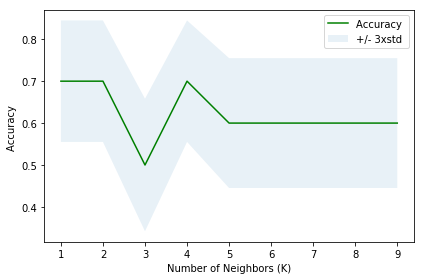

Train set Accuracy:  0.810810810811
Test set Accuracy:  0.6
The best accuracy was with 0.7 with k= 1


In [122]:
#K Nearest Neighbor(KNN)

#calculate the accuracy for different Ks

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc
#plot model accuracy for different number of neighbors
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))
#select best K setting
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [137]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat_knn = neigh.predict(X_test)
yhat_knn[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [130]:
# logistic regression

#Train Model and Predict  
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
yhat_lr = LR.predict(X_test)
yhat_prob_lr = LR.predict_proba(X_test)
yhat[0:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [132]:
# Decision Tree

#Train Model and Predict
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
DTree.fit(X_train,y_train)

yhat_dt = DTree.predict(X_test)
yhat_dt[0:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [133]:
#Support Vector Machine

#Train Model and Predict
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

yhat_svm = clf.predict(X_test)
yhat_svm [0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

             precision    recall  f1-score   support

          0       0.75      0.86      0.80         7
          1       0.50      0.33      0.40         3

avg / total       0.68      0.70      0.68        10

Confusion matrix, without normalization
[[6 1]
 [2 1]]


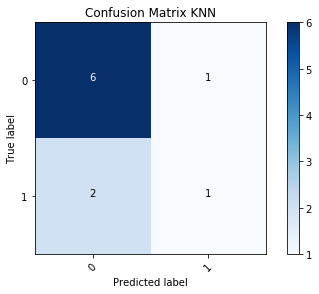

In [138]:
#Confusion Matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

             precision    recall  f1-score   support

          0       0.75      0.86      0.80         7
          1       0.50      0.33      0.40         3

avg / total       0.68      0.70      0.68        10

Confusion matrix, without normalization
[[6 1]
 [2 1]]


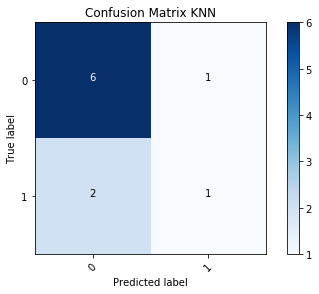

In [139]:
#Metrics and Confusion Matrix KNN
cnf_matrix = confusion_matrix(y_test, yhat_knn, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_knn))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion Matrix KNN')

             precision    recall  f1-score   support

          0       0.75      0.86      0.80         7
          1       0.50      0.33      0.40         3

avg / total       0.68      0.70      0.68        10

Confusion matrix, without normalization
[[6 1]
 [2 1]]


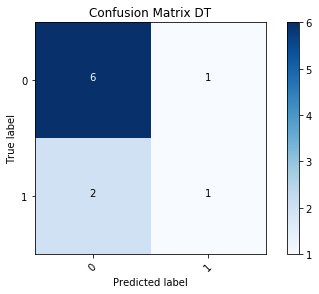

In [140]:
#Metrics and Confusion Matrix DT
cnf_matrix = confusion_matrix(y_test, yhat_dt, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_dt))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion Matrix DT')

In [99]:
jaccard_similarity_score(y_test, yhat_lr)

0.80000000000000004

             precision    recall  f1-score   support

          0       0.86      0.86      0.86         7
          1       0.67      0.67      0.67         3

avg / total       0.80      0.80      0.80        10

Confusion matrix, without normalization
[[6 1]
 [1 2]]


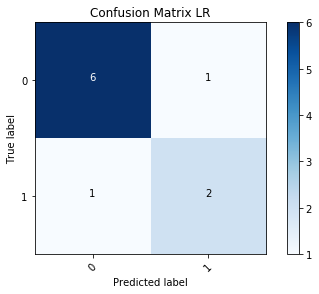

In [141]:
#Metrics and Confusion Matrix LR
cnf_matrix = confusion_matrix(y_test, yhat_lr, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_lr))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion Matrix LR')

             precision    recall  f1-score   support

          0       0.70      1.00      0.82         7
          1       0.00      0.00      0.00         3

avg / total       0.49      0.70      0.58        10

Confusion matrix, without normalization
[[7 0]
 [3 0]]


/opt/conda/envs/DSX-Python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


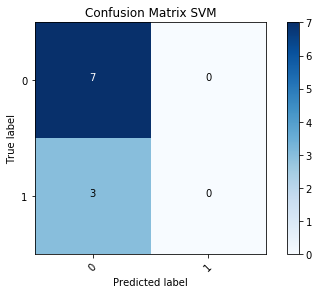

In [142]:
#Metrics and Confusion Matrix SVM
cnf_matrix = confusion_matrix(y_test, yhat_svm, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_svm))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1],normalize= False,  title='Confusion Matrix SVM')

In [143]:
log_loss(y_test, yhat_prob_lr)

0.44706033185054928